In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
path = r'D:\RNW\Project\Simple Linear Regression\Green-Done.csv'
#reading the dataset
df = pd.read_csv(path)

#displaying the first 5 rows of the dataset 
df.head()


,Index,vendor_id,pickup_datetime,dropoff_datetime,PickUP_Date,PickUP_Time,DROP_DATE,DROP_Time,Store_and_fwd_flag,rate_code,...,Tolls_amount,Ehail_fee,Total_amount,Payment_type,Trip_type,Pickup_latitude,Pickup_longitude,Dropoff_latitude,Dropoff_longitude,TIme Difference
0,1,1,12-18-2013 10:26:21 PM,12/18/2013 10:44:38 PM,18-12-2013,22.26.21,18-12-2013,22:44:38,N,1,...,0.0,NaN,39.65,1,NaN,40.840973,-73.944603,40.733532,-73.976028,0:18:17
1,2,2,12-30-2013 7:59:47 PM,12/30/2013 8:05:13 PM,30-12-2013,19:59:47,30-12-2013,20:05:13,N,1,...,0.0,NaN,7.50,2,NaN,40.756344,-73.929871,40.752438,-73.914932,0:05:26
2,3,2,11-06-2013 21:09,06-11-2013 21:34,06-11-2013,21:09:30,11-06-2013,21:34:37,N,1,...,0.0,NaN,23.00,2,NaN,40.761784,-73.925674,40.720242,-73.987396,0:25:07
3,4,2,12-15-2013 10:57:20 AM,12/15/2013 11:03:07 AM,15-12-2013,10:57:20,15-12-2013,11:03:07,N,1,...,0.0,NaN,7.00,2,NaN,40.766762,-73.921349,40.782784,-73.910858,0:05:47
4,5,2,10-12-2013 19:10,10-12-2013 19:14,12-10-2013,19:10:06,12-10-2013,19:14:29,N,1,...,0.0,NaN,7.70,1,NaN,40.679272,-73.982048,40.674004,-73.975769,0:04:23


In [3]:
#checking the shape of the dataset
print(df.shape)

#checking the data types of the columns
print(df.dtypes)

#checking for missing values
print(df.isnull().sum())

#checking the distribution of the target variable
print(df['Total_amount'].value_counts())


(286368, 26)
Index                   int64
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
PickUP_Date            object
PickUP_Time            object
DROP_DATE              object
DROP_Time              object
Store_and_fwd_flag     object
rate_code               int64
Passenger_count         int64
Trip_distance         float64
Fare_amount           float64
Extra                 float64
MTA_tax               float64
Tip_amount            float64
Tolls_amount          float64
Ehail_fee             float64
Total_amount          float64
Payment_type            int64
Trip_type             float64
Pickup_latitude       float64
Pickup_longitude      float64
Dropoff_latitude      float64
Dropoff_longitude     float64
TIme Difference        object
dtype: object
Index                      0
vendor_id                  0
pickup_datetime            0
dropoff_datetime           0
PickUP_Date                0
PickUP_Time                0
DROP_DATE          

In [4]:
#new DF for simple linear regression
df1 = df[['Trip_distance', 'Fare_amount']]


In [5]:
df1.head()

,Trip_distance,Fare_amount
0,10.20,29.5
1,1.05,6.0
2,6.07,22.0
3,1.38,6.5
4,0.60,5.0


In [6]:
X = df1.iloc[:,0].values
y = df1.iloc[:,1].values

In [7]:
X

array([10.2 ,  1.05,  6.07, ...,  3.19,  2.6 ,  0.71])

In [8]:
y

array([29.5,  6. , 22. , ..., 13. , 10.5,  7. ])

In [9]:

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train.reshape(-1, 1), y_train)

LinearRegression()

In [12]:
X_test

array([1.17, 1.03, 0.98, ..., 3.2 , 0.65, 8.7 ])

In [13]:
y_test

array([ 7. ,  6. ,  4.5, ..., 13. ,  5. , 28. ])

In [14]:
lr.predict(X_test.reshape(-1, 1))

array([ 7.25783958,  6.8675485 ,  6.72815883, ..., 12.91706019,
        5.80818701, 28.24992392])

In [15]:
m = lr.coef_

In [16]:
m

array([2.78779341])

In [17]:
b = lr.intercept_

In [18]:
b

3.9961212960663524

In [21]:
# y = mx + b

m * 2.2 + b

array([10.12926679])

Text(0, 0.5, 'Fare Amount')

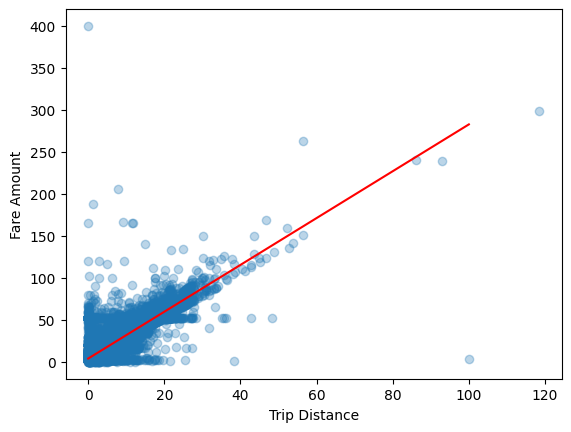

In [20]:
plt.scatter(df1['Trip_distance'], df1['Fare_amount'], alpha=0.3)
# Sort X_train for a smooth regression line
sorted_idx = X_train.argsort()
plt.plot(X_train[sorted_idx], lr.predict(X_train.reshape(-1, 1))[sorted_idx], color='red')
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')